# Laboratório 8 - Gabarito

Nota: Substitua os seus nomes e informações abaixo antes do envio da atividade. A atividade deve ser enviada no `Moodle` da disciplina, e o arquivo **DEVE** estar no formato `.ipynb`.

[Nome Aluno 1] / [NUSP Aluno 1] / [Vespertino/Noturno]

[Nome Aluno 2] / [NUSP Aluno 2] / [Vespertino/Noturno]


## Exercícios

In [28]:
from sklearn.linear_model import LogisticRegression # Modelo de regressão logística do sklearn
from sklearn.model_selection import train_test_split # Função para dividir o banco entre treino e teste
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Algumas métricas e relatórios
import random
import re # Biblioteca de regular expressions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize # Tokenizador do nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
# Importando o Vetorizador do sklearn
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Agora, vocês vão fazer a classificação de sentimento do banco, reclassificando a tarefa como binária (Negativo e Não Negativo).

1 - Filtre somente as observações relevantes do banco e salve as colunas de interesse (texto e sentimento) em duas variáveis: X (features) e y (target).

In [29]:
url = "https://github.com/NUPRAM/CoViD-Pol/raw/main/Covid-Pol_Corpus_v2.0.csv"
df = pd.read_csv(url)
df = df[df['relevant'] == True]
df['relevant'].value_counts()

,count
relevant,
True,5962


2 - Qual a distribuição de classes em Sentimento?

In [30]:
df['final_sentiment'].value_counts()

,count
final_sentiment,
positive,2789
negative,2767
unclear,390


3 - Junte as classes "Positive" e "Unclear" em uma só. A classificação deve ser binária entre "Negativo" e "Não Negativo".

In [31]:
def condicao(x):
    if x == 'positive':
        return 0 # positivo = 0
    elif x == 'unclear':
        return 0 # unclear = 0
    else:
        return 1

df['final_sentiment_dummy'] = df['final_sentiment'].apply(condicao)
df['final_sentiment_dummy'].value_counts()

,count
final_sentiment_dummy,
0,3179
1,2783


4 - Faça a divisão entre teste e treino, deixando 10% para teste. Não esqueça de estabelecer uma seed (random_state) de 42.

In [32]:
import re

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df["texto_processado"] = df['content'].apply(preprocess_text)

pd.set_option('display.max_colwidth', None) # Para mostrar a coluna inteira

# Imprimindo
df[['content','texto_processado']]

,content,texto_processado
0,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",a cabeça pensa onde o pé pisa quem governa de dentro do escritório com ar condicionado não conhece o dia a dia das escolas em poa o protocolo de volta s aulas de marchezan como diz profalexfraga é miserável e coloca a vida de alunos e professores em risco semvacinasemaula
1,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: #Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",sarto vai fazer um grande programa de enfrentamento pandemia vai garantir a vacina da covid e muito mais confira o programa de hoje fortaleza caminhandojuntos comforçaecoragem sarto fortalezacadavezmelhor trabalhosério
2,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,a câmara dos deputados votou hoje a mp que trata da adesão do brasil aliança de vacinação contra a covid o psol encaminhou voto favorável vacina nosso partido defende que o negacionismo de bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado
3,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,tirar bolsonaro do poder é uma questão de vida ou morte um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder forabolsonaro impeachmentdebolsonaro bolsonarogenocida
4,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",e a liesa decidiu adiar os desfiles do carnavalrj sem data não dá para pensar em sambódromo sem a esperada vacina agora é olhar pros profissionais do carnaval que precisam de apoio até o fim da pandemia delegadamartharocha carnavalriodejaneiro
...,...,...
9187,Iniciou hoje a segunda etapa da Campanha Nacional de Vacinação contra a Gripe. As 134 salas de vacina abertas da @saudepoa passam a atender todos os grupos prioritários. A Campanha vai até 31 de maio e a meta é imunizar 90% da população alvo. https://t.co/MPQLqylOlX,iniciou hoje a segunda etapa da campanha nacional de vacinação contra a gripe as salas de vacina abertas da saudepoa passam a atender todos os grupos prioritários a campanha vai até de maio e a meta é imunizar da população alvo
9189,"DEGRADAÇÃO DA SAÚDE PÚBLICA\nFalta de vacina e remédios, atendimento precário, falta de médico, UBSs sem médico. É a SP de Bruno Covas e Doria https://t.co/e4x910naUM",degradação da sa de p blica falta de vacina e remédios atendimento precário falta de médico ubss sem médico é a sp de bruno covas e doria
9215,"A vacina está disponível para pessoas a partir dos 60 anos, crianças até 6 anos, gestantes ou mulheres que pariram recentemente e portadores de algumas doenças crônicas como hipertensão e diabetes. #vacinanatal #prefeiturapresente #DiaD https://t.co/OlikUWfbIp",a vacina está dispon vel para pessoas a partir dos anos crianças até anos gestantes ou mulheres que pariram recentemente e portadores de algumas doenças cr nicas como hipertensão e diabetes vacinanatal prefeiturapresente diad
9229,"📲LIVE DE SEXTA\nQuer tirar dúvidas 

In [44]:
X = df['texto_processado']
y = df['final_sentiment_dummy']


X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.1, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

6 - Apresente quantas observações ficarão para treino e validação em cada uma das dobras (folds):

In [35]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10) # O default é 5

for i, (train_index, test_index) in enumerate(kf.split(X_treino)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: tamanho={len(train_index)}")
  print(f"  Teste:  tamanho={len(test_index)}")

Dobra (Fold) 0:
  Treino: tamanho=4828
  Teste:  tamanho=537
Dobra (Fold) 1:
  Treino: tamanho=4828
  Teste:  tamanho=537
Dobra (Fold) 2:
  Treino: tamanho=4828
  Teste:  tamanho=537
Dobra (Fold) 3:
  Treino: tamanho=4828
  Teste:  tamanho=537
Dobra (Fold) 4:
  Treino: tamanho=4828
  Teste:  tamanho=537
Dobra (Fold) 5:
  Treino: tamanho=4829
  Teste:  tamanho=536
Dobra (Fold) 6:
  Treino: tamanho=4829
  Teste:  tamanho=536
Dobra (Fold) 7:
  Treino: tamanho=4829
  Teste:  tamanho=536
Dobra (Fold) 8:
  Treino: tamanho=4829
  Teste:  tamanho=536
Dobra (Fold) 9:
  Treino: tamanho=4829
  Teste:  tamanho=536


7 - Qual a distribuição de classes no y_treino e no y_teste?

In [36]:
y_treino.value_counts()

,count
final_sentiment_dummy,
0,2860
1,2505


In [37]:
y_teste.value_counts()

,count
final_sentiment_dummy,
0,319
1,278


8 - Faça o loop de treinamento com um k-fold com 10 folds

In [45]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

kf = KFold(n_splits=10, shuffle=True, random_state=42)
resultados = pd.DataFrame()

for i, (train_index, test_index) in enumerate(kf.split(X_treino)):  # X é pandas Series com textos brutos
    # Dividir os textos em treino e teste por índice
    X_treino_kf = X_treino.iloc[train_index]
    X_teste_kf = X_treino.iloc[test_index]
    y_treino_kf = y_treino.iloc[train_index]
    y_teste_kf = y_treino.iloc[test_index]

    # Criar vetorizar do zero para cada fold
    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))
    X_treino_vec = vectorizer.fit_transform(X_treino_kf)
    X_teste_vec = vectorizer.transform(X_teste_kf)  # usar transform para teste

    # Treinar o modelo com vetores
    modelo = LogisticRegression(random_state=42)
    modelo.fit(X_treino_vec, y_treino_kf)

    # Predição e avaliação
    y_pred_kf = modelo.predict(X_teste_vec)
    precisao, revocacao, f1, suporte = precision_recall_fscore_support(y_teste_kf, y_pred_kf, average=None, labels=[0, 1])

    metricas_dict = {
        'Precision': precisao,
        'Recall': revocacao,
        'F1-score': f1,
        'Fold': i
    }
    metricas = pd.DataFrame(metricas_dict)
    metricas.reset_index(inplace=True)
    metricas.rename(columns={'index': 'Classe'}, inplace=True)

    resultados = pd.concat([resultados, metricas], axis=0)

resultados.reset_index(drop=True, inplace=True)



9 - Apresente o dataframe de resultados

In [46]:

def condicao(x):
    if x == 1:
        return "Negativo"
    else:
        return "Não Negativo"


resultados['Classe'] = resultados['Classe'].apply(condicao)

resultados

,Classe,Precision,Recall,F1-score,Fold
0,Não Negativo,0.849840,0.860841,0.855305,0
1,Negativo,0.808036,0.793860,0.800885,0
2,Não Negativo,0.815789,0.864111,0.839255,1
3,Negativo,0.832618,0.776000,0.803313,1
4,Não Negativo,0.830565,0.892857,0.860585,2
5,Negativo,0.872881,0.801556,0.835700,2
6,Não Negativo,0.783439,0.848276,0.814570,3
7,Negativo,0.802691,0.724696,0.761702,3
8,Não Negativo,0.805112,0.884211,0.842809,4
9,Negativo,0.852679,0.757937,0.802521,4


10 - Apresente a distribuição da Precision

<Figure size 1200x1200 with 0 Axes>

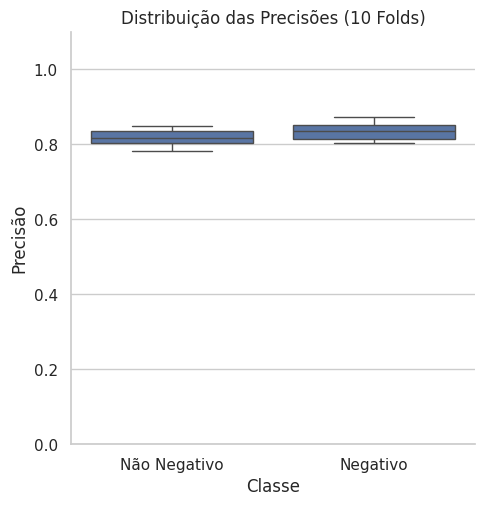

In [47]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Precision", kind="box")
sns.despine()

plt.ylabel("Precisão")
plt.xlabel("Classe")
plt.title("Distribuição das Precisões (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

11 - Discuta os resultados de precision pensando na variância dos valores para cada uma das classes:

RESPOSTA:

12 - Apresente a distribuição do Recall

<Figure size 1200x1200 with 0 Axes>

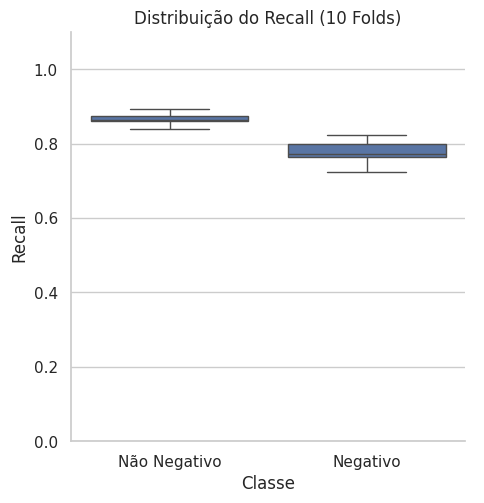

In [48]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Recall", kind="box")
sns.despine()

plt.ylabel("Recall")
plt.xlabel("Classe")
plt.title("Distribuição do Recall (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

13 - Discuta os resultados do recall pensando na variância dos valores para cada uma das classes:

RESPOSTA:

14 - Apresente a distribuição dos F1-Scores

<Figure size 1200x1200 with 0 Axes>

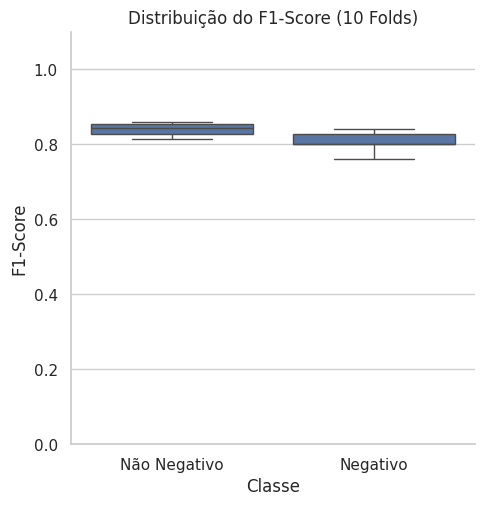

In [49]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="F1-score", kind="box")
sns.despine()

plt.ylabel("F1-Score")
plt.xlabel("Classe")
plt.title("Distribuição do F1-Score (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

15 - Discuta os resultados do f1-score pensando na variância dos valores para cada uma das classes:

RESPOSTA:

16 - Treine o modelo com o banco de treino e faça a predição dos valores no banco de teste (Não esqueça de vetorizar o banco de teste separadamente):

In [50]:
X_treino_vec = vectorizer.fit_transform(X_treino)
X_teste_vec = vectorizer.transform(X_teste)  # usar transform para teste

modelo = LogisticRegression(random_state=42)
modelo.fit(X_treino_vec, y_treino)

y_pred = modelo.predict(X_teste_vec)

17 - Apresente o relatório de classificação no banco de teste

In [52]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       319
           1       0.84      0.84      0.84       278

    accuracy                           0.85       597
   macro avg       0.85      0.85      0.85       597
weighted avg       0.85      0.85      0.85       597



18 - Discuta os resultados encontrados no exercício 17: Os valores se encontram dentro do esperado no K-fold Cross-validation? O que isso significa para nossa confiabilidade nos resultados?

RESULTADO: